<a href="https://colab.research.google.com/github/darcusco/Data-Science-Exam/blob/master/CNNxrayPneu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code will be used for mounting the gdrive and downloadint the dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle" # /content/gdrive/My Drive/Kaggle First on the Keggle account we go and generate new api. It downloads as Keggle.json and this is the location that is saved on the drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/

/content/gdrive/My Drive/Kaggle


In [5]:
%mkdir lung_xray

mkdir: cannot create directory ‘lung_xray’: File exists


In [6]:
!ls

kaggle.json  lung_xray


In [7]:
%cd lung_xray

/content/gdrive/My Drive/Kaggle/lung_xray


In [8]:
#Uncomment code to download dataset
#!kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

In [9]:
#Uncomment to unzip and remove the zip file
#!unzip \*.zip  && rm *.zip

In [10]:
!ls

test  train  val


After the data is organised and we are in the right working directory we will import important packages

In [11]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


Now we preprocess the data and prepare it for model training

In [12]:
datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.1, zoom_range = 0.2, rotation_range = 5, width_shift_range=0.1, height_shift_range=0.1)

In [13]:
batch_size = 16
img_height = 150
img_width = 150

In [14]:
traindat = datagen.flow_from_directory("train/",target_size=(img_height, img_width), class_mode="binary", color_mode='grayscale', batch_size=batch_size)
valdat = datagen.flow_from_directory("val/",target_size=(img_height, img_width), class_mode="binary",color_mode='grayscale', batch_size=batch_size)



Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [15]:
traindat.class_indices

{'normal': 0, 'opacity': 1}

Before training, let us visualise how an example of a normal x-ray and a pneumonia x-ray

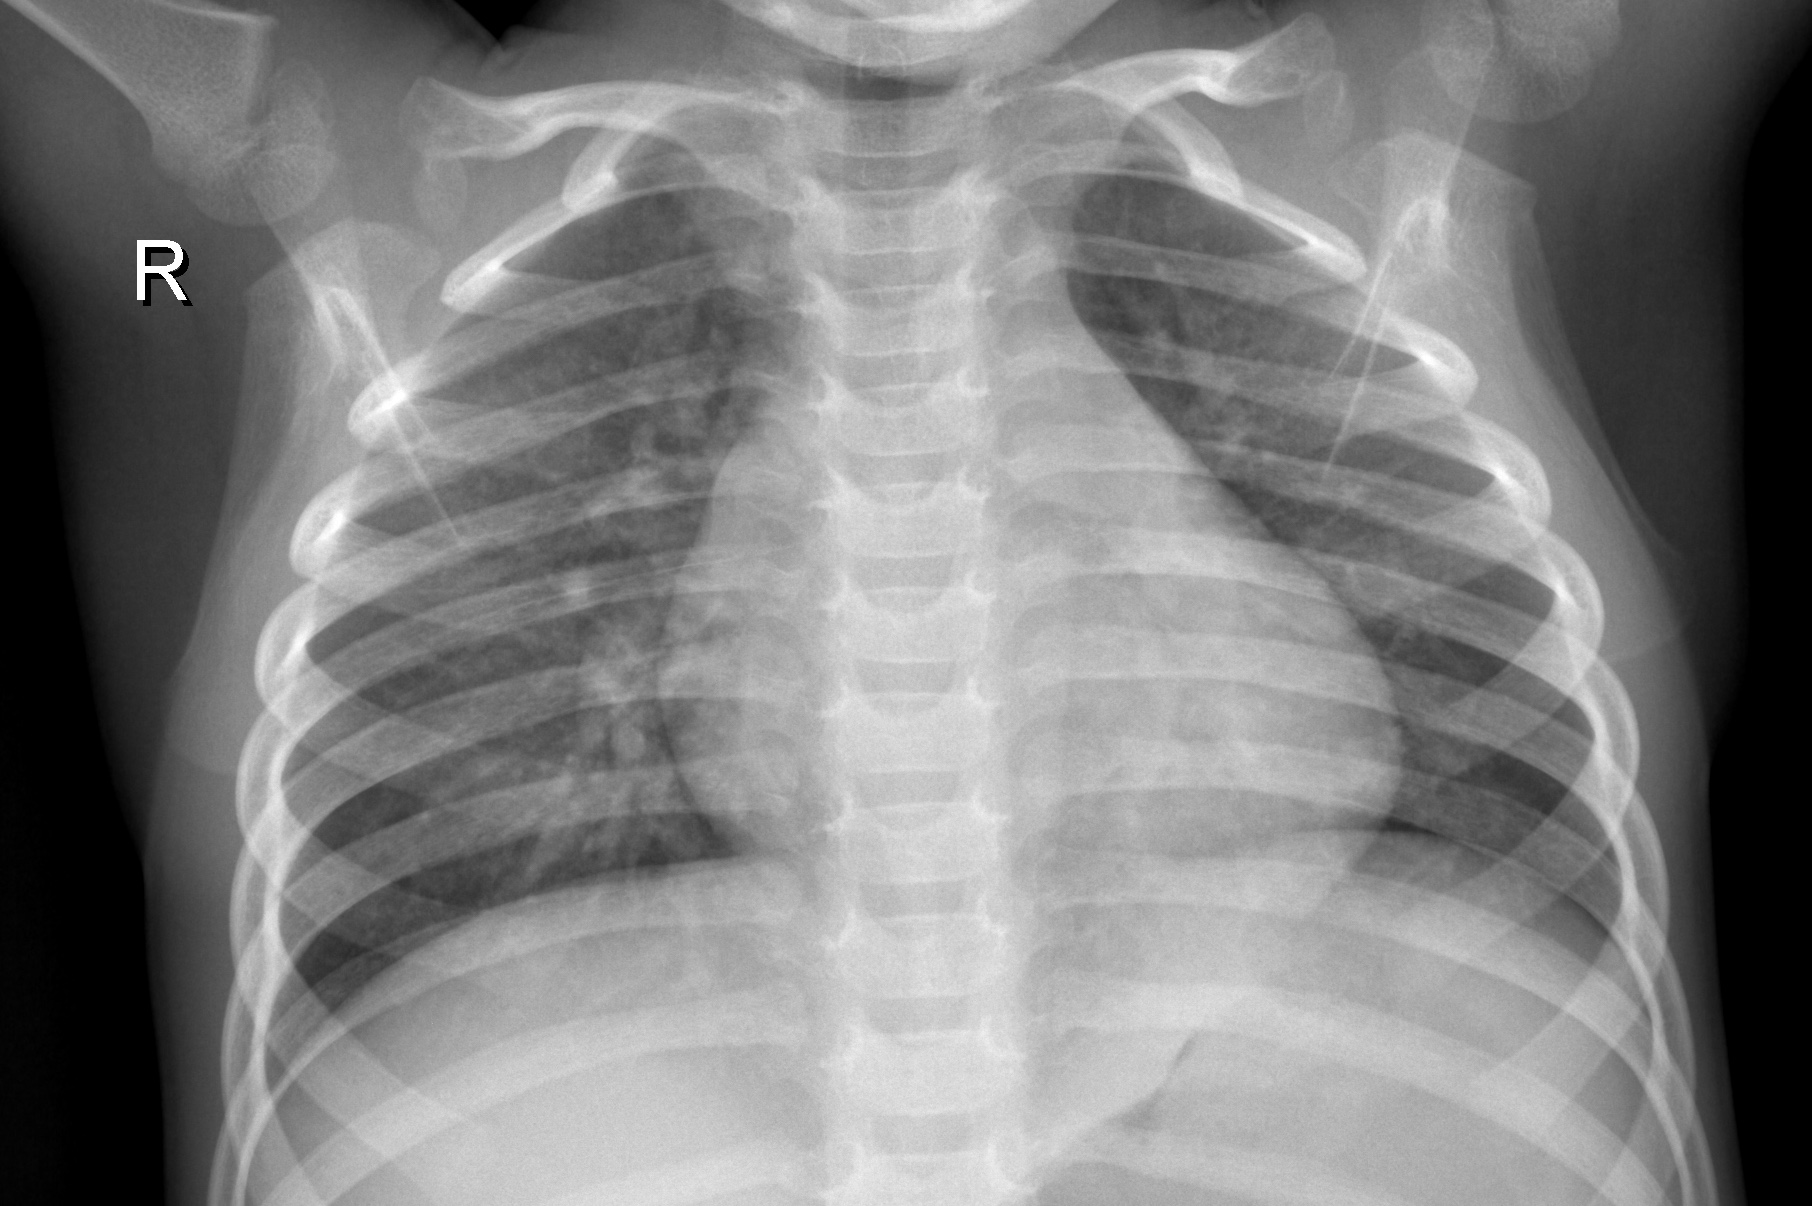

In [20]:
dataset_norm = tf.io.gfile.glob('train/normal/*')
PIL.Image.open(str(dataset_norm[0]))

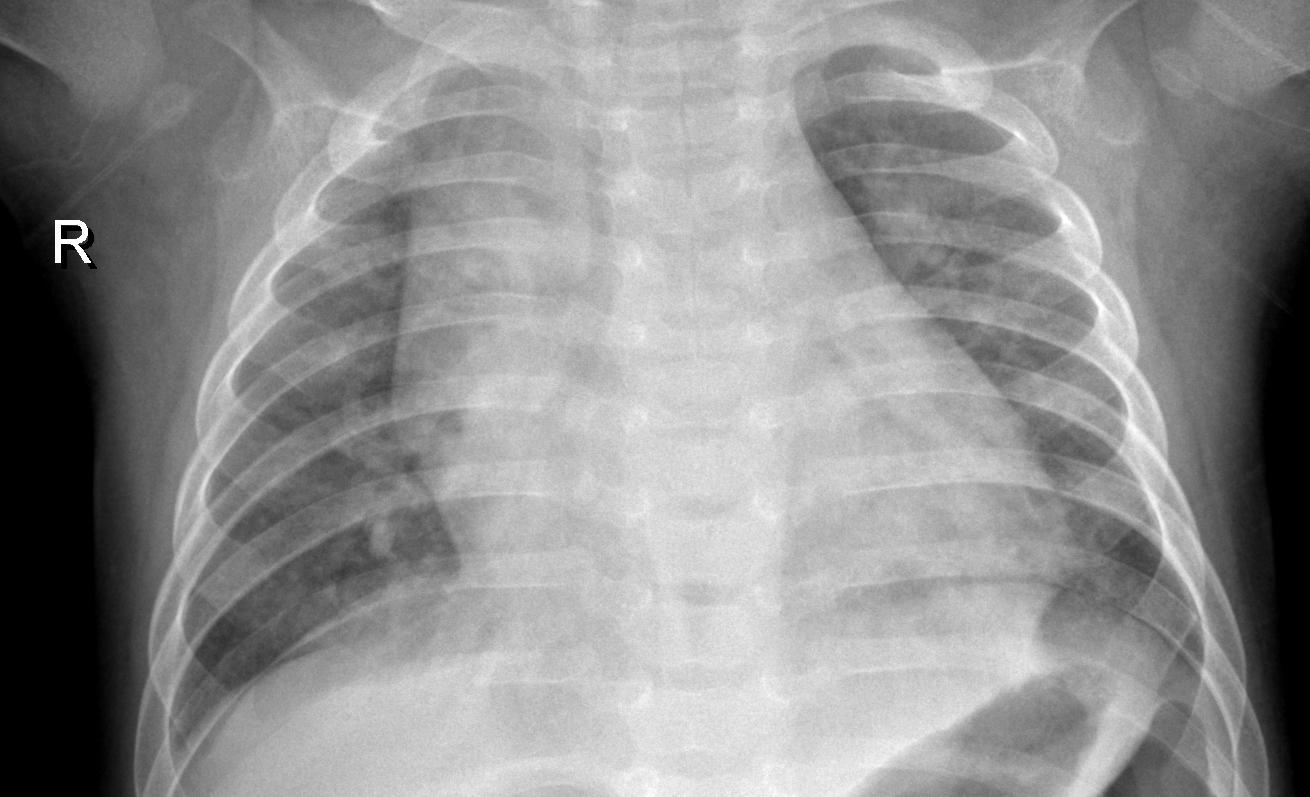

In [21]:
dataset_pne = tf.io.gfile.glob('train/opacity/*')
PIL.Image.open(str(dataset_pne[0]))

Now, let's plot the the data distribution in the training set

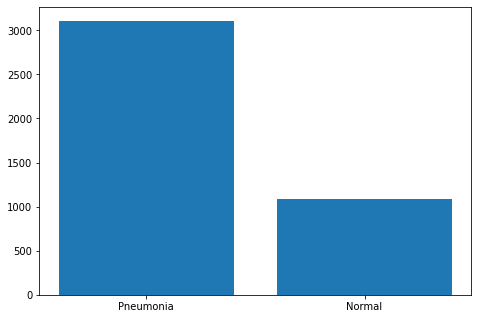

In [36]:
Pneumonia_cases=np.count_nonzero(traindat.classes)
Normal_Cases = len(traindat.classes) - Pneumonia_cases
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Pneumonia', 'Normal']
students = [Pneumonia_cases,Normal_Cases]
ax.bar(langs,students)
plt.show()

The following code is setting up the convolutional model

In [347]:
 model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [349]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])



In [350]:
for image_batch, labels_batch in traindat:
  print(image_batch.shape)     
  print(labels_batch.shape)
  break


(16, 150, 150, 1)
(16,)


In [351]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 15, 15, 64)      

Now we do the training

In [352]:
epochs=10
history = model.fit(
  traindat,
  validation_data=valdat,
  epochs=epochs
)


Epoch 1/10
262/262 [==============================] - 136s 519ms/step - loss: 0.5414 - acc: 0.7741 - val_loss: 0.3796 - val_acc: 0.8442
Epoch 2/10
262/262 [==============================] - 133s 509ms/step - loss: 0.2642 - acc: 0.8911 - val_loss: 0.4000 - val_acc: 0.8327
Epoch 3/10
262/262 [==============================] - 136s 518ms/step - loss: 0.2213 - acc: 0.9142 - val_loss: 0.2576 - val_acc: 0.9000
Epoch 4/10
262/262 [==============================] - 135s 515ms/step - loss: 0.1896 - acc: 0.9254 - val_loss: 0.2340 - val_acc: 0.9029
Epoch 5/10
262/262 [==============================] - 136s 518ms/step - loss: 0.1581 - acc: 0.9380 - val_loss: 0.3879 - val_acc: 0.8404
Epoch 6/10
262/262 [==============================] - 135s 514ms/step - loss: 0.1294 - acc: 0.9566 - val_loss: 0.1763 - val_acc: 0.9375
Epoch 7/10
262/262 [==============================] - 136s 518ms/step - loss: 0.1581 - acc: 0.9431 - val_loss: 0.1595 - val_acc: 0.9442
Epoch 8/10
262/262 [============================

Plotting the accuracy and loss accross epochs for training and validation

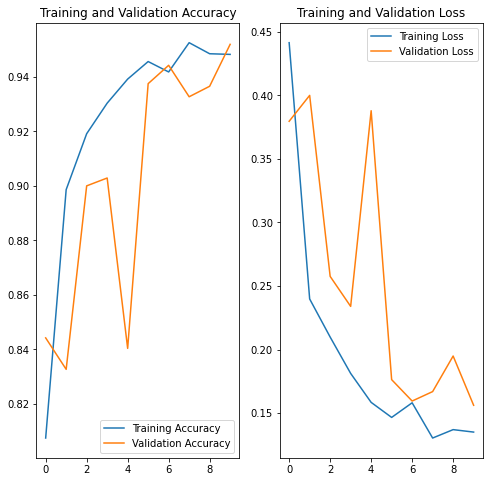

In [353]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Now, we try out to add dropouts and observe if the model becomes better

In [360]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [362]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])



In [363]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 17, 17, 32)      

In [364]:
epochs=10
history = model.fit(
  traindat,
  validation_data=valdat,
  epochs=epochs
)


Epoch 1/10
262/262 [==============================] - 139s 530ms/step - loss: 0.5494 - acc: 0.7593 - val_loss: 0.3159 - val_acc: 0.8750
Epoch 2/10
262/262 [==============================] - 137s 523ms/step - loss: 0.2666 - acc: 0.8934 - val_loss: 0.2622 - val_acc: 0.8933
Epoch 3/10
262/262 [==============================] - 138s 527ms/step - loss: 0.2387 - acc: 0.8981 - val_loss: 0.2896 - val_acc: 0.8846
Epoch 4/10
262/262 [==============================] - 137s 522ms/step - loss: 0.2070 - acc: 0.9191 - val_loss: 0.2387 - val_acc: 0.9087
Epoch 5/10
262/262 [==============================] - 137s 522ms/step - loss: 0.1640 - acc: 0.9380 - val_loss: 0.2024 - val_acc: 0.9269
Epoch 6/10
262/262 [==============================] - 137s 522ms/step - loss: 0.1708 - acc: 0.9341 - val_loss: 0.1675 - val_acc: 0.9413
Epoch 7/10
262/262 [==============================] - 137s 522ms/step - loss: 0.1443 - acc: 0.9406 - val_loss: 0.2170 - val_acc: 0.9231
Epoch 8/10
262/262 [============================

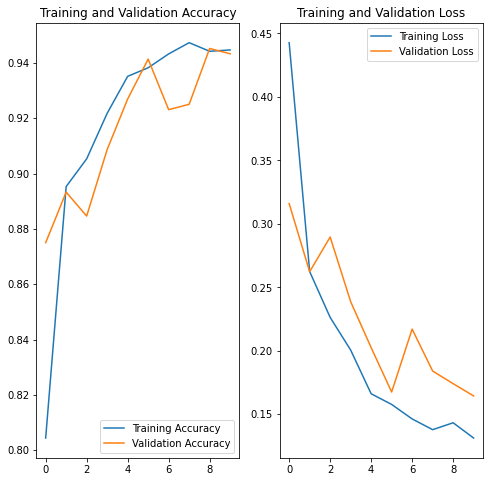

In [365]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Finally we prepare the testing data

In [366]:
testdat = datagen.flow_from_directory("test/",target_size=(img_height, img_width), class_mode="binary",color_mode='grayscale',shuffle=False, batch_size=1)

Found 624 images belonging to 2 classes.


In [367]:
testdat.class_indices

{'normal': 0, 'opacity': 1}

In [368]:
testdat.filenames[0]

'normal/IM-0001-0001.jpeg'

In [369]:
predictions = model.predict(testdat)




In [370]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Here we plot the confusion matrix of predicting pneumonia of test data using the final model

In [371]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(testdat.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm


,Predicted Normal,Predicted Pneumonia
Actual Normal,142,92
Actual Pneumonia,3,387
